# Zomato Restaurant

C SOMA SEKHAR GOUD

BATCH.NO: DS2307



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import math
import warnings
warnings.filterwarnings('ignore')

In [73]:
df1 = pd.read_excel('Country-Code.xlsx')
df2 = pd.read_csv('zomato.csv')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [74]:
df2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [75]:
df = pd.merge(df1,df2)
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


>Problem statement : Predict 2 things –
1) Average Cost for two- A regression problem

2) Price range - Classification problem

In [76]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [77]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
500000      1
1540        1
125         1
445         1
535         1
Name: Average Cost for two, Length: 140, dtype: int64

In [78]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [79]:
# for now lets drop  Restaurant ID, City,Locality Verbose, since the other columns are representing the same. 
df= df.drop([ 'Restaurant ID','City','Locality Verbose'], axis=1)

In [80]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

* All values in Switch to order menu'are No,This might be that the restaurant does not provide an option to switch to an online ordering menu through the Zomato platform.

In [81]:
# We have no use of 'Switch to order menu' 
df= df.drop(['Switch to order menu'], axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant Name       9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

In [83]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant Name         0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

* Data is clear with no Null values

### Location of restaurents

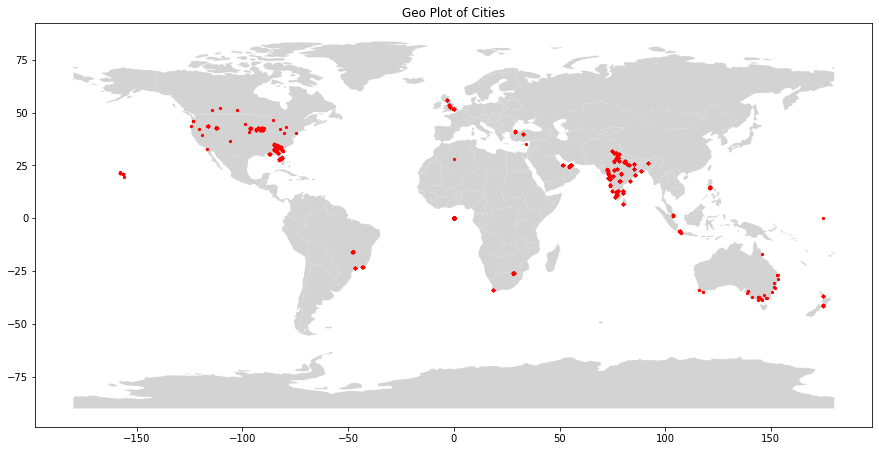

In [84]:
from shapely.geometry import Point

# Create a GeoDataFrame with Point geometries
geometry = [Point(lon, lat) for lon, lat in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load world map for reference
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot cities on the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot cities with color based on 'City'
gdf.plot(ax=ax, color='red', markersize=5)

plt.title('Geo Plot of Cities')
plt.show()


In [85]:
# Now we have no use of Latitude Longitude
df= df.drop(['Longitude','Latitude'], axis=1)

                Count  Percentage
Country                          
India            8652   90.587373
United States     434    4.544027
United Kingdom     80    0.837609
UAE                60    0.628206
South Africa       60    0.628206
Brazil             60    0.628206
New Zealand        40    0.418804
Turkey             34    0.355984
Australia          24    0.251283
Phillipines        22    0.230342
Indonesia          21    0.219872
Sri Lanka          20    0.209402
Qatar              20    0.209402
Singapore          20    0.209402
Canada              4    0.041880


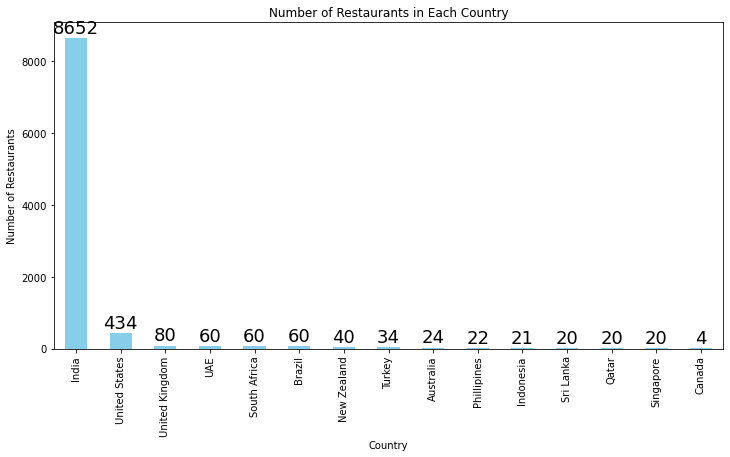

In [86]:
# Number of Restaurants in Each Country
country_counts = df['Country'].value_counts()
total_restaurants = len(df)

# Calculate percentages
country_percentages = (country_counts / total_restaurants) * 100

# Display count and percentage side by side
result = pd.DataFrame({'Count': country_counts, 'Percentage': country_percentages})
result.index.name = 'Country'

print(result)


# Plotting the bar graph
plt.figure(figsize=(12, 6))
ax = country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=18)

plt.show()

* Zomato Restaurants are so high in India when compared to rest of the countries, next comes US. 
* In total Zomato restaurents are in 15 countries. 

Top 10 Restaurants with Highest Votes:
                Restaurant Name  Votes
104                        Toit  10934
111                    Truffles   9667
3370           Hauz Khas Social   7931
1788                  Peter Cat   7574
115   AB's - Absolute Barbecues   6907
1790            Barbeque Nation   5966
119                 Big Brewsky   5705
1683  AB's - Absolute Barbecues   5434
112             The Black Pearl   5385
1787                      BarBQ   5288


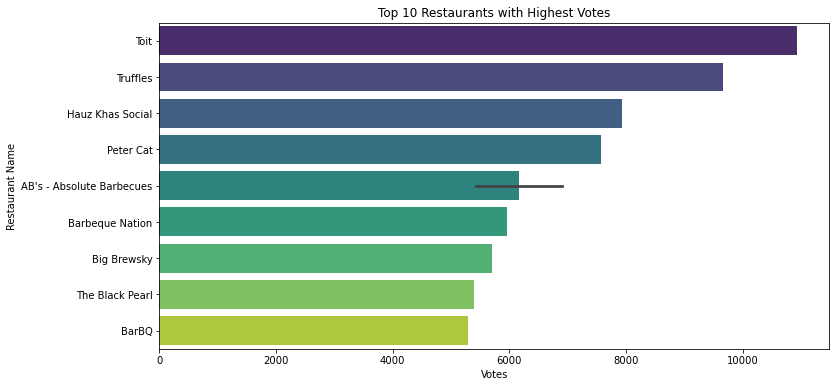

In [87]:
# Top 10 Restaurents overall
top_10_restaurants = df.nlargest(10, 'Votes')[['Restaurant Name', 'Votes']]

print("Top 10 Restaurants with Highest Votes:")
print(top_10_restaurants)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Restaurant Name', data=top_10_restaurants, palette='viridis')
plt.title('Top 10 Restaurants with Highest Votes')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.show()

### Lets look at what Cuisines are most popular in all countries.

                Unique Cuisines Count  Total Cuisines Count
Country                                                    
Australia                          21                    24
Brazil                             42                    60
Canada                              4                     4
India                            1392                  8652
Indonesia                          18                    21
New Zealand                        28                    40
Phillipines                        19                    22
Qatar                              14                    20
Singapore                          19                    20
South Africa                       56                    60
Sri Lanka                          20                    20
Turkey                             23                    34
UAE                                46                    60
United Kingdom                     57                    80
United States                     229   

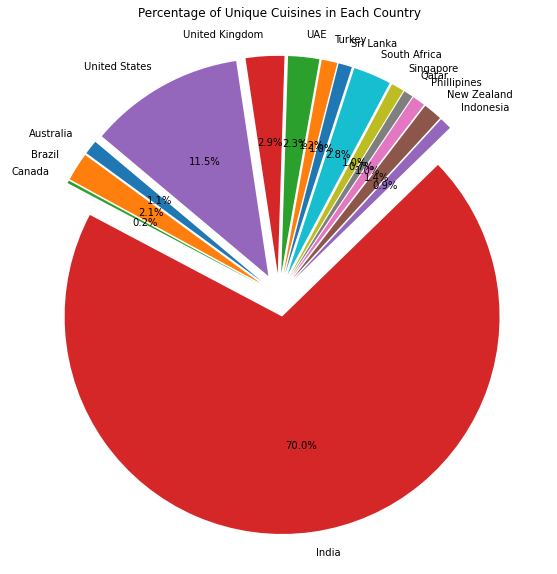

In [88]:
""" Lets Find total No.of Cuisines in each Country"""

# Assuming your DataFrame is named 'df'
unique_cuisines_by_country = df.groupby('Country')['Cuisines'].nunique()
total_cuisines_by_country = df.groupby('Country')['Cuisines'].count()

# Combine the Series into a DataFrame
result_df = pd.DataFrame({'Unique Cuisines Count': unique_cuisines_by_country, 'Total Cuisines Count': total_cuisines_by_country})

# Print the DataFrame
print(result_df)

# Explode all slices
explode = [0.1] * len(unique_cuisines_by_country)

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(unique_cuisines_by_country, labels=unique_cuisines_by_country.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Percentage of Unique Cuisines in Each Country')
plt.show()

* India and United States have lot of various cuisines when compared to rest of the countries, especially In India.

> Lets pick top cuisines in each country based on votes

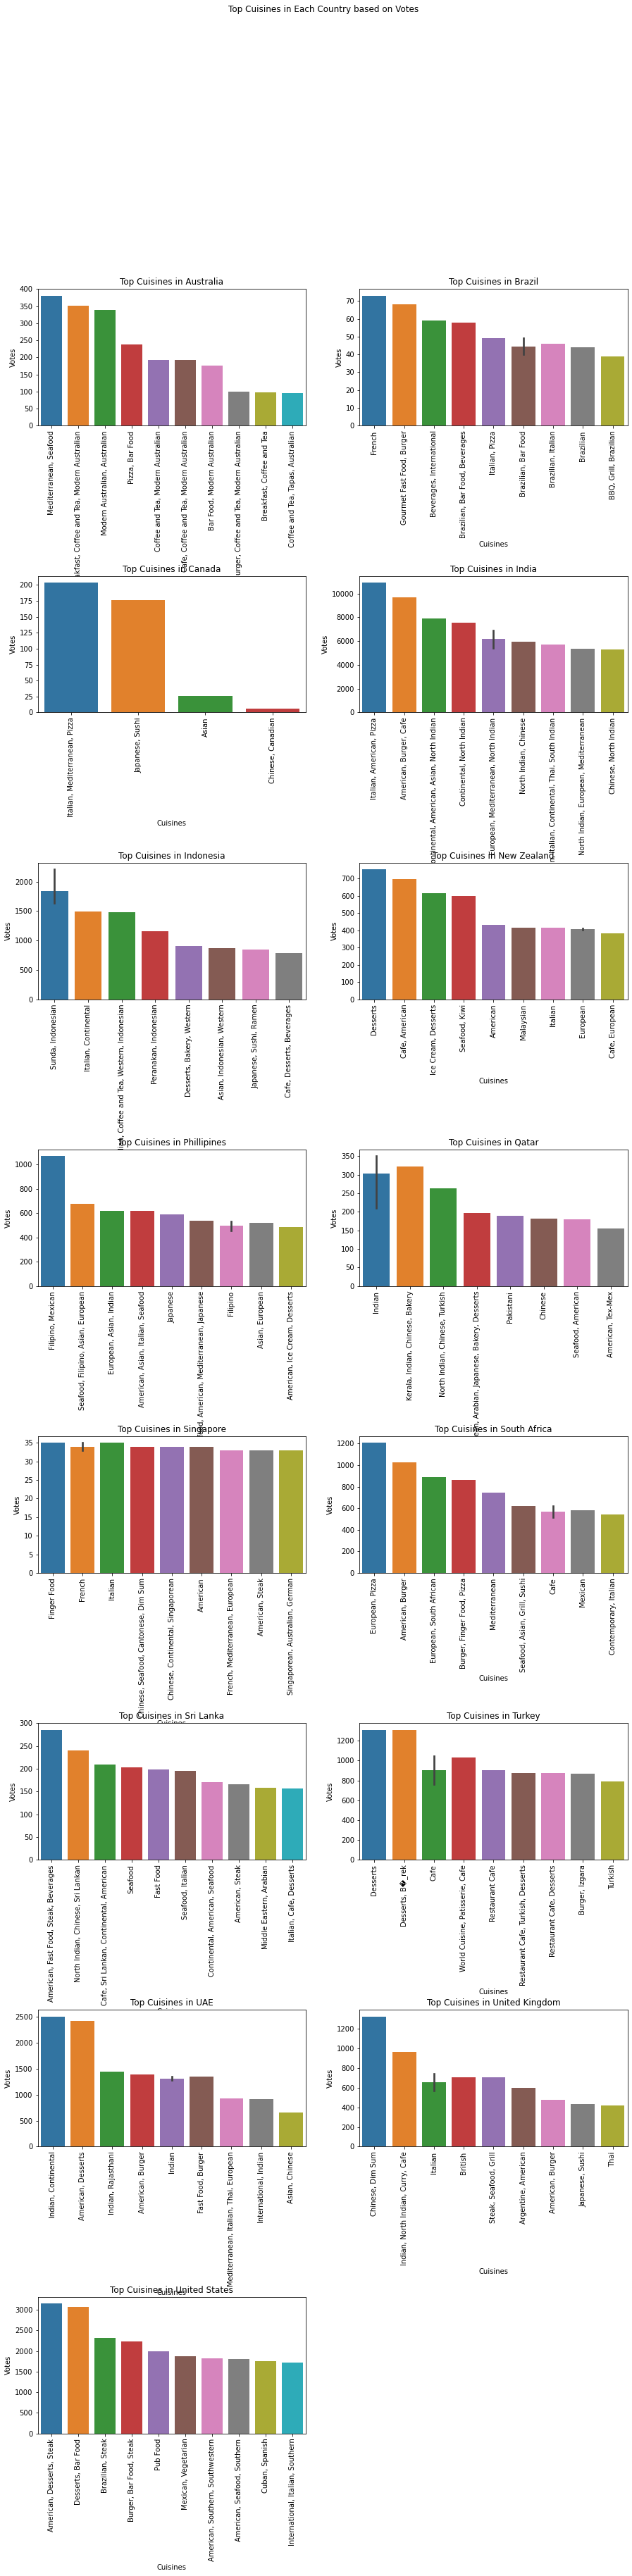

In [89]:
from matplotlib.gridspec import GridSpec

# Sort the DataFrame by 'Votes' in descending order for each country
sorted_df = df.sort_values(by='Votes', ascending=False).groupby('Country')

# Calculate the grid layout dynamically based on the number of unique countries
num_countries = len(sorted_df)
rows = (num_countries + 1) // 2  

# Create a grid of bar charts for the top 10 cuisines in each country
fig = plt.figure(figsize=(15, 7 * rows))
fig.suptitle('Top Cuisines in Each Country based on Votes')

gs = GridSpec(rows, 2, figure=fig, hspace=1.1)  
for i, (country, group) in enumerate(sorted_df):
    if i >= rows * 2:
        break  
    row, col = i // 2, i % 2
    top_cuisines = group.head(10)
    
    ax = fig.add_subplot(gs[row, col])
    sns.barplot(x='Cuisines', y='Votes', data=top_cuisines, ax=ax)
    ax.set_title(f'Top Cuisines in {country}')
    ax.set_ylabel('Votes')
    ax.tick_params(axis='x', rotation=90)

plt.show()


In [90]:
# # Currency zomata dealing with
unique_currency_country = df[['Currency', 'Country']].drop_duplicates()

for _, row in unique_currency_country.iterrows():
    print(f"- {row['Country']} ----> {row['Currency']}")


- India ----> Indian Rupees(Rs.)
- Australia ----> Dollar($)
- Brazil ----> Brazilian Real(R$)
- Canada ----> Dollar($)
- Indonesia ----> Indonesian Rupiah(IDR)
- New Zealand ----> NewZealand($)
- Phillipines ----> Botswana Pula(P)
- Qatar ----> Qatari Rial(QR)
- Singapore ----> Dollar($)
- South Africa ----> Rand(R)
- Sri Lanka ----> Sri Lankan Rupee(LKR)
- Turkey ----> Turkish Lira(TL)
- UAE ----> Emirati Diram(AED)
- United Kingdom ----> Pounds(��)
- United States ----> Dollar($)


In [91]:
df.columns

Index(['Country Code', 'Country', 'Restaurant Name', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

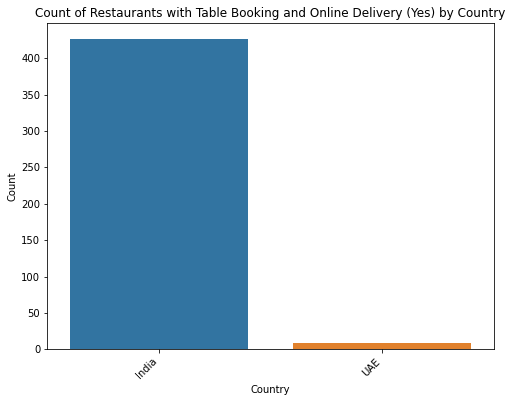

In [92]:
#lets make a count plot using sns  with condition being Has Table booking(Yes) and Has Online delivery(Yes) 

condition = (df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes')

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Country', data=df[condition])
plt.title('Count of Restaurants with Table Booking and Online Delivery (Yes) by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()


* It seems only India and UAE are offering Both Online Delivery and Table Booking

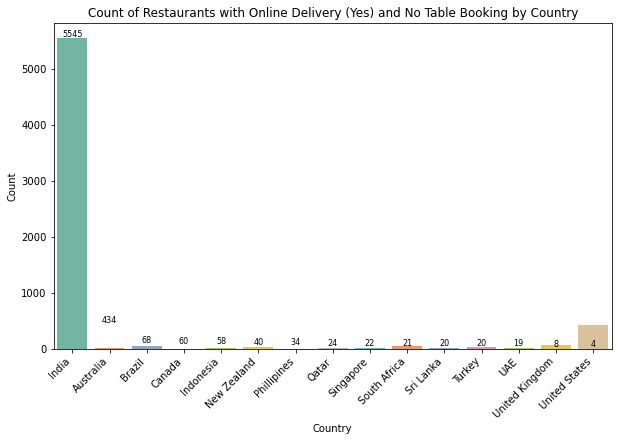

In [93]:
condition = (df['Has Online delivery'] == 'No') & (df['Has Table booking'] == 'No')

# Filter the DataFrame based on the condition
filtered_df = df[condition]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=filtered_df, palette='Set2')

# Annotate bars with count values
for i, count in enumerate(filtered_df['Country'].value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

plt.title('Count of Restaurants with Online Delivery (Yes) and No Table Booking by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

In [94]:
df['Rating color'].unique()

array(['Yellow', 'Green', 'Orange', 'Dark Green', 'White', 'Red'],
      dtype=object)

In [95]:
df['Rating text'].unique()

array(['Good', 'Very Good', 'Average', 'Excellent', 'Not rated', 'Poor'],
      dtype=object)

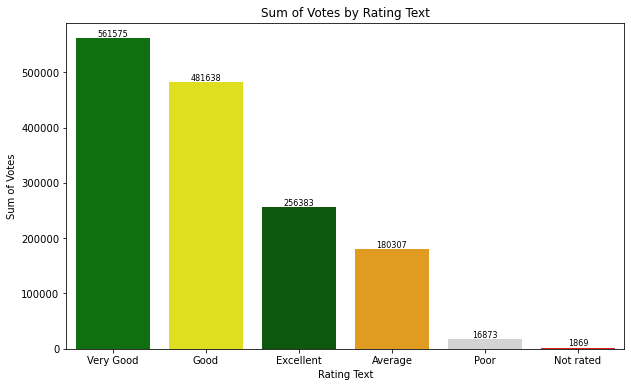

In [96]:
# Map 'Not rated' to 0 votes for aggregation
df['Votes'] = df['Votes'].replace('Not rated', 0).astype(float)

# Group by 'Rating text' and sum up the votes
votes_by_rating = df.groupby('Rating text')['Votes'].sum().reset_index()

# Sort the DataFrame by votes in descending order
votes_by_rating = votes_by_rating.sort_values(by='Votes', ascending=False)

# Define colors for each category.This is assigned based on 'Rating color' column
colors = {
    'Good': 'yellow',
    'Very Good': 'green',
    'Average': 'orange',
    'Excellent': 'darkgreen',
    'Not rated': 'red',
    'Poor': 'lightgray' 
}

# Create a count plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating text', y='Votes', data=votes_by_rating, order=votes_by_rating['Rating text'],
            palette=[colors[rt] for rt in votes_by_rating['Rating text']])
plt.title('Sum of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Sum of Votes')

# Annotate bars with vote counts
for i, count in enumerate(votes_by_rating['Votes']):
    plt.text(i, count + 50, str(int(count)), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

The above chart can help to understand what kind of rated restaurents are most chosen.

In [97]:
# dropping "Rating color" column
df= df.drop(['Rating color'], axis=1)

In [98]:
df.head(2)

,Country Code,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,India,Jahanpanah,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140.0
1,1,India,Rangrezz Restaurant,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71.0


### Only Online Delivery

In [99]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [100]:
# Total no.of restaurents opened for/running online delivery

# Filtering the DataFrame based on the condition
delivering_now_and_online = df[(df['Is delivering now'] == 'Yes') & (df['Has Online delivery'] == 'Yes')]

# Count the number of rows in the filtered DataFrame
count_deliveries = len(delivering_now_and_online)

print(f"Total No.of restaurents that are providing/Available for Online delivery' : {count_deliveries}")

Total No.of restaurents that are providing/Available for Online delivery' : 34


In [101]:
# Filter the DataFrame based on the condition
delivering_now_and_online_df = df[(df['Is delivering now'] == 'Yes') & (df['Has Online delivery'] == 'Yes')]


selected_columns = ['Country', 'Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating', 'Rating text', 'Votes']
Online_delivery_df = delivering_now_and_online_df[selected_columns]

# Containg details of Online Delivery Restaurents
Online_delivery_df

,Country,Restaurant Name,Cuisines,Price range,Aggregate rating,Rating text,Votes
163,India,The Night Factory,"North Indian, Chinese, Continental, Pizza",2,3.7,Good,665.0
719,India,Cake 24x7,Bakery,2,3.3,Average,25.0
721,India,Cake Point,"Bakery, Desserts",2,2.9,Average,7.0
732,India,Grandma's Kitchen,"North Indian, South Indian",1,2.5,Average,20.0
779,India,Dabba Meat,North Indian,2,3.1,Average,195.0
787,India,Monster's Cafe,"Continental, North Indian, Chinese",3,3.5,Good,269.0
846,India,Captain Bill$ Deliverz,"North Indian, Chinese, Fast Food",3,2.7,Average,185.0
910,India,E Yum,"Continental, Italian, Mexican",2,3.4,Average,69.0
1145,India,Captain Bill$ Deliverz,"North Indian, Chinese, Fast Food",3,2.4,Poor,23.0
1364,India,Ullu Delivers,"North Indian, Chinese",2,2.8,Average,5.0


* Only "India" have Zomota Restaurents with online and are very less that are providing/Available for Online delivery(34). Seems like UAE Only online delivery restaurents has been shutdowned
* Out of which Most Restaurents(24) are offering Noth Indian cousine
* Restaurents with Online deliverys are having descent ratings with minimal Rrice ranges.

### Only Table booking 

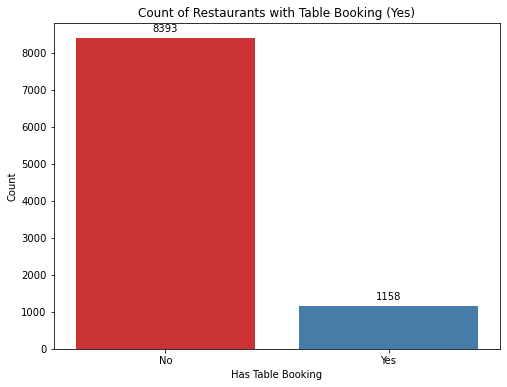

In [102]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Has Table booking', data=df, palette='Set1')
plt.title('Count of Restaurants with Table Booking (Yes)')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

* Very less Restuarents are offering Table Booking

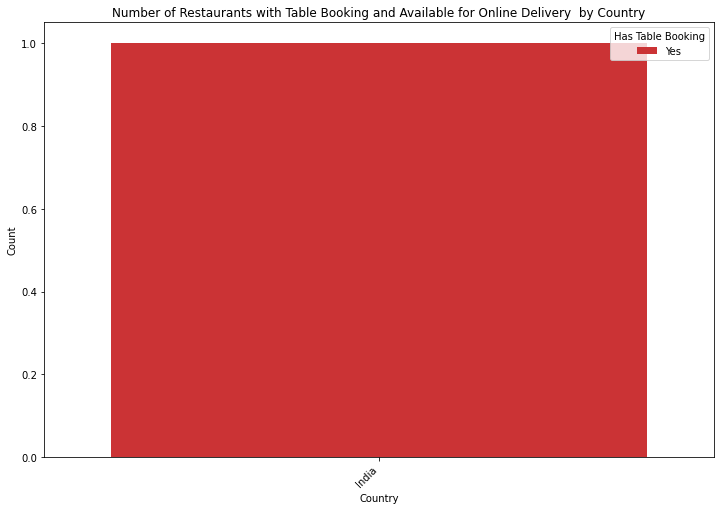

In [103]:
#No.of restaurents that are providing Table Booking and Online delivery


filtered_df = df[(df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes') & (df['Is delivering now'] == 'Yes')]

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Has Table booking', data=filtered_df, palette='Set1')
plt.title('Number of Restaurants with Table Booking and Available for Online Delivery  by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Has Table Booking', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

In [104]:
# Filter the DataFrame for restaurants with the specified conditions
filtered_df = df[(df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes') & (df['Is delivering now'] == 'Yes')]

# Count the number of restaurants
num_restaurants = len(filtered_df)

# Display the count and details of restaurants
print(f"Number of Restaurants with Both Table Booking & Online Delivery Available Now: {num_restaurants}")

for _, row in filtered_df.iterrows():
    print(f"Restaurant Name: {row['Restaurant Name']}")
    print(f" *Cuisines: {row['Cuisines']}")
    print(f"Locality: {row['Locality']}")


Number of Restaurants with Both Table Booking & Online Delivery Available Now: 1
Restaurant Name: Horn Please
 *Cuisines: North Indian, Mughlai, Chinese
Locality: Chittaranjan Park


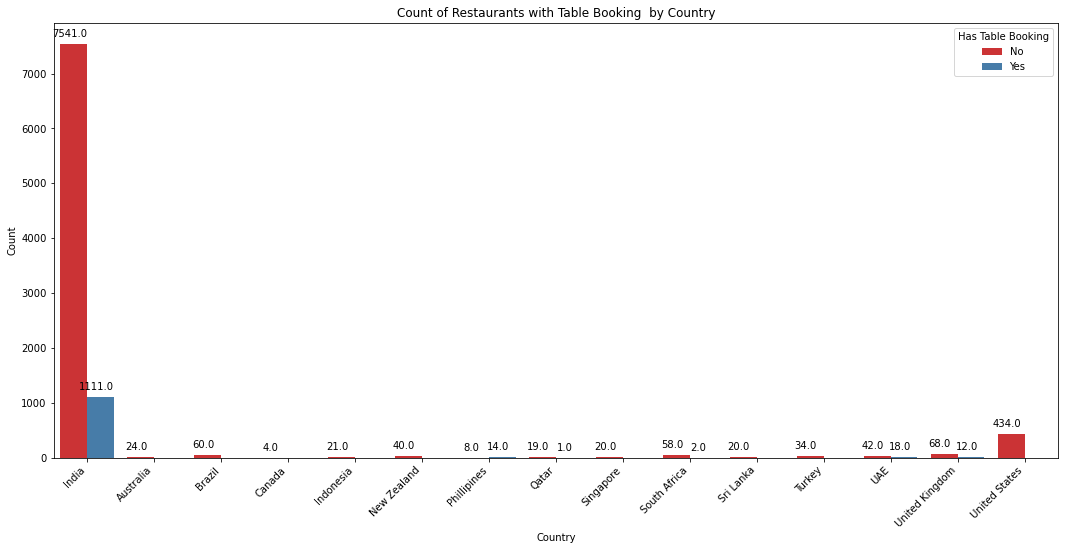

In [105]:
# Create a count plot of Restaurants with Table Booking  by Country
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='Country', hue='Has Table booking', data=df, palette='Set1')
plt.title('Count of Restaurants with Table Booking  by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Has Table Booking', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 3., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

In [106]:
df.head(1)

,Country Code,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,India,Jahanpanah,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140.0


In [107]:
df= df.drop(['Country','Restaurant Name','Address','Locality',], axis=1)

In [108]:
df

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140.0
1,1,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71.0
2,1,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94.0
3,1,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87.0
4,1,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177.0
...,...,...,...,...,...,...,...,...,...,...,...
9546,216,"American, Bar Food",10,Dollar($),No,No,No,1,3.7,Good,101.0
9547,216,Thai,10,Dollar($),No,No,No,1,3.5,Good,58.0
9548,216,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,2,3.9,Good,156.0
9549,216,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,2,3.9,Good,156.0


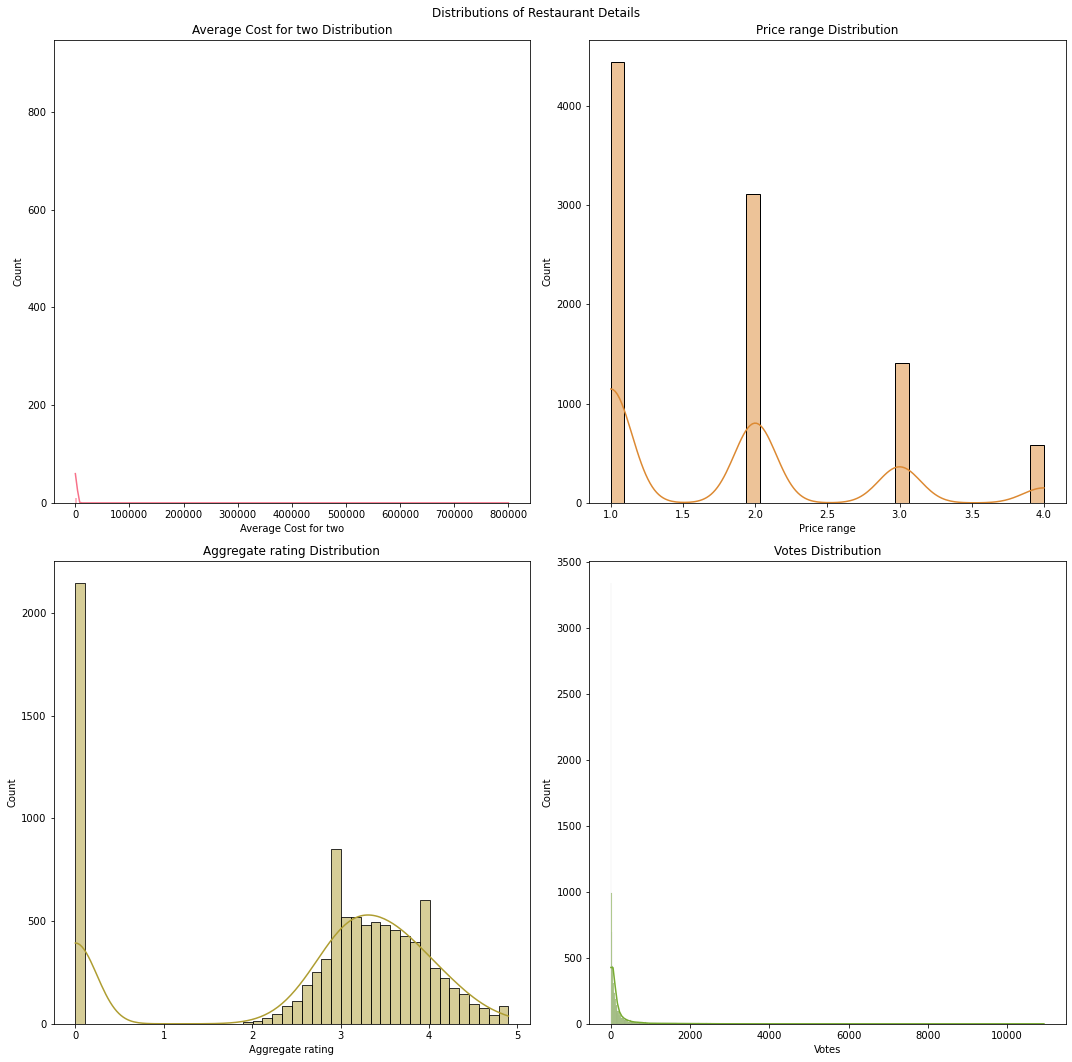

In [109]:
numerical_features = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

# Create a 2x2 grid of distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Distributions of Restaurant Details')

for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2
    sns.histplot(df[feature], kde=True, color=sns.color_palette("husl", 10)[i], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

# Removes any empty subplot(s) if there are more than 4 features
if len(numerical_features) < 4:
    fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()


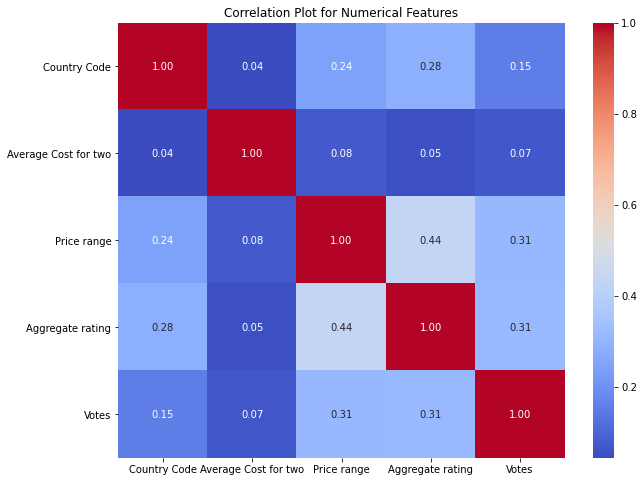

In [110]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Numerical Features')
plt.show()

* there aren't much of attributes that are influencing others
* 'Price range' shows moderate positive correlations with 'Aggregate rating' and 'Votes,' implies that higher price ranges may be associated with higher ratings and more votes.

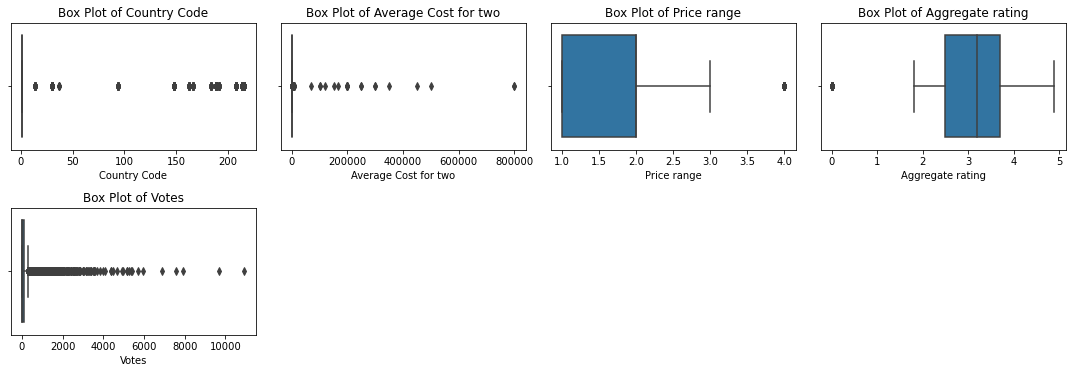

In [111]:
# Select numerical columns for box plots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create individual box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [112]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display the count of outliers in each numerical column
outliers_count = outliers.sum()
print("Count of outliers in each numerical column:")
print(outliers_count)

Count of outliers in each numerical column:
Country Code             899
Average Cost for two     853
Price range              586
Aggregate rating        2148
Votes                   1126
dtype: int64


### Lets deal with '0' in Aggregate rating i.e 'Not rated'
Aggregate rating is 0 for Not rated category,Which indirectly represents as null value.

So to deal with this we replace the 0 with average  Aggregate rating in which average is calculated by segregating on the basis of Cuisines and Price range 

In [114]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [115]:
# Assuming your DataFrame is named 'df'
rating_counts = df['Aggregate rating'].value_counts()

# Print counts and Rating text side by side
for rating, count in rating_counts.items():
    rating_text = df[df['Aggregate rating'] == rating]['Rating text'].iloc[0]
    print(f"Aggregate Rating: {rating}, Rating Text: {rating_text}, Count: {count}")

Aggregate Rating: 0.0, Rating Text: Not rated, Count: 2148
Aggregate Rating: 3.2, Rating Text: Average, Count: 522
Aggregate Rating: 3.1, Rating Text: Average, Count: 519
Aggregate Rating: 3.4, Rating Text: Average, Count: 498
Aggregate Rating: 3.3, Rating Text: Average, Count: 483
Aggregate Rating: 3.5, Rating Text: Good, Count: 480
Aggregate Rating: 3.0, Rating Text: Average, Count: 468
Aggregate Rating: 3.6, Rating Text: Good, Count: 458
Aggregate Rating: 3.7, Rating Text: Good, Count: 427
Aggregate Rating: 3.8, Rating Text: Good, Count: 400
Aggregate Rating: 2.9, Rating Text: Average, Count: 381
Aggregate Rating: 3.9, Rating Text: Good, Count: 335
Aggregate Rating: 2.8, Rating Text: Average, Count: 315
Aggregate Rating: 4.1, Rating Text: Very Good, Count: 274
Aggregate Rating: 4.0, Rating Text: Very Good, Count: 266
Aggregate Rating: 2.7, Rating Text: Average, Count: 250
Aggregate Rating: 4.2, Rating Text: Very Good, Count: 221
Aggregate Rating: 2.6, Rating Text: Average, Count: 19

In [116]:
df.head()

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140.0
1,1,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71.0
2,1,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94.0
3,1,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87.0
4,1,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177.0


In [119]:
df['Cuisines'].value_counts()

North Indian                                                      936
North Indian, Chinese                                             511
Chinese                                                           354
Fast Food                                                         354
North Indian, Mughlai                                             334
                                                                 ... 
Mediterranean, Italian, Thai, European                              1
North Indian, Chinese, Continental, Italian, Mexican, Lebanese      1
North Indian, European, Continental, Finger Food                    1
Cafe, Desserts, Healthy Food, Juices                                1
Fast Food, Continental, Italian, Bakery                             1
Name: Cuisines, Length: 1825, dtype: int64

In [122]:
df_temp = df.copy()
dfnot= df_temp[df_temp['Rating text']=='Not rated']
dfnot

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
247,1,Mithai,100,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,1.0
248,1,North Indian,100,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,3.0
249,1,"North Indian, Mughlai, Chinese",400,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,3.0
250,1,Cafe,300,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0.0
254,1,North Indian,200,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8732,30,Brazilian,50,Brazilian Real(R$),No,No,No,2,0.0,Not rated,2.0
9051,215,"Greek, Mediterranean, Middle Eastern",20,Pounds(��),No,No,No,2,0.0,Not rated,3.0
9268,216,"American, Bar Food, BBQ",25,Dollar($),No,No,No,2,0.0,Not rated,2.0
9269,216,Mexican,25,Dollar($),No,No,No,2,0.0,Not rated,3.0


In [124]:
df_rated= df_temp[df_temp['Rating text']!='Not rated']
df_rated

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140.0
1,1,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71.0
2,1,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94.0
3,1,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87.0
4,1,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177.0
...,...,...,...,...,...,...,...,...,...,...,...
9546,216,"American, Bar Food",10,Dollar($),No,No,No,1,3.7,Good,101.0
9547,216,Thai,10,Dollar($),No,No,No,1,3.5,Good,58.0
9548,216,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,2,3.9,Good,156.0
9549,216,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,2,3.9,Good,156.0


In [125]:
dfnot[['Cuisines','Price range']]

,Cuisines,Price range
247,Mithai,1
248,North Indian,1
249,"North Indian, Mughlai, Chinese",1
250,Cafe,1
254,North Indian,1
...,...,...
8732,Brazilian,2
9051,"Greek, Mediterranean, Middle Eastern",2
9268,"American, Bar Food, BBQ",2
9269,Mexican,2


In [129]:
comb = dfnot[['Cuisines','Price range']].drop_duplicates()

In [130]:
comb

,Cuisines,Price range
247,Mithai,1
248,North Indian,1
249,"North Indian, Mughlai, Chinese",1
250,Cafe,1
255,"North Indian, Chinese",1
...,...,...
8731,"Brazilian, Mineira",3
9051,"Greek, Mediterranean, Middle Eastern",2
9268,"American, Bar Food, BBQ",2
9269,Mexican,2


In [132]:
comb.to_numpy()

array([['Mithai', 1],
       ['North Indian', 1],
       ['North Indian, Mughlai, Chinese', 1],
       ['Cafe', 1],
       ['North Indian, Chinese', 1],
       ['Desserts', 1],
       ['Fast Food', 1],
       ['American, Fast Food, Salad, Healthy Food', 2],
       ['South Indian', 1],
       ['North Indian, Chinese', 3],
       ['Cafe', 3],
       ['North Indian, Mughlai, Chinese', 3],
       ['North Indian, Chinese, Continental', 3],
       ['North Indian, Mughlai', 2],
       ['Mughlai', 2],
       ['Fast Food, Beverages', 1],
       ['Ice Cream, Desserts', 1],
       ['North Indian', 2],
       ['North Indian, Mughlai, Chinese', 2],
       ['North Indian, Chinese', 2],
       ['Chinese, North Indian', 1],
       ['Chinese', 1],
       ['Fast Food', 2],
       ['Cafe', 2],
       ['Mithai, North Indian', 1],
       ['Ice Cream, Desserts, Beverages', 1],
       ['North Indian, Fast Food', 1],
       ['Asian', 2],
       ['Street Food, Fast Food', 1],
       ['North Indian, Seafood', 2

In [136]:
fillers = pd.DataFrame(columns = ['Cuisines','Price range','Aggregate rating'])
for i in comb.to_numpy():
    cusine = i[0]
    price = i[1]
    rating = df_rated[(df_rated['Cuisines'] == cusine) | (df['Price range'] == price)]['Aggregate rating'].mean()
    fillers = fillers.append(pd.DataFrame([[cusine, price, rating]],columns = ['Cuisines','Price range','Aggregate rating']))

In [137]:
fillers

,Cuisines,Price range,Aggregate rating
0,Mithai,1,3.238885
0,North Indian,1,3.247439
0,"North Indian, Mughlai, Chinese",1,3.232319
0,Cafe,1,3.257764
0,"North Indian, Chinese",1,3.230359
...,...,...,...
0,"Brazilian, Mineira",3,3.777276
0,"Greek, Mediterranean, Middle Eastern",2,3.377167
0,"American, Bar Food, BBQ",2,3.377167
0,Mexican,2,3.382164


In [140]:
dff = pd.merge(dfnot,fillers,on = ['Cuisines','Price range'], how = 'left')
dff

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating_x,Rating text,Votes,Aggregate rating_y
0,1,Mithai,100,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,1.0,3.238885
1,1,North Indian,100,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,3.0,3.247439
2,1,"North Indian, Mughlai, Chinese",400,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,3.0,3.232319
3,1,Cafe,300,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0.0,3.257764
4,1,North Indian,200,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,1.0,3.247439
...,...,...,...,...,...,...,...,...,...,...,...,...
2143,30,Brazilian,50,Brazilian Real(R$),No,No,No,2,0.0,Not rated,2.0,3.379095
2144,215,"Greek, Mediterranean, Middle Eastern",20,Pounds(��),No,No,No,2,0.0,Not rated,3.0,3.377167
2145,216,"American, Bar Food, BBQ",25,Dollar($),No,No,No,2,0.0,Not rated,2.0,3.377167
2146,216,Mexican,25,Dollar($),No,No,No,2,0.0,Not rated,3.0,3.382164


In [144]:
dff.drop('Aggregate rating_x', axis =1, inplace = True)

In [146]:
dff.rename(columns ={'Aggregate rating_y': 'Aggregate rating'},inplace=True)

In [172]:
dff

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes,Aggregate rating
0,1,Mithai,100,Indian Rupees(Rs.),No,No,No,1,Not rated,1.0,3.238885
1,1,North Indian,100,Indian Rupees(Rs.),No,No,No,1,Not rated,3.0,3.247439
2,1,"North Indian, Mughlai, Chinese",400,Indian Rupees(Rs.),No,No,No,1,Not rated,3.0,3.232319
3,1,Cafe,300,Indian Rupees(Rs.),No,No,No,1,Not rated,0.0,3.257764
4,1,North Indian,200,Indian Rupees(Rs.),No,No,No,1,Not rated,1.0,3.247439
...,...,...,...,...,...,...,...,...,...,...,...
2143,30,Brazilian,50,Brazilian Real(R$),No,No,No,2,Not rated,2.0,3.379095
2144,215,"Greek, Mediterranean, Middle Eastern",20,Pounds(��),No,No,No,2,Not rated,3.0,3.377167
2145,216,"American, Bar Food, BBQ",25,Dollar($),No,No,No,2,Not rated,2.0,3.377167
2146,216,Mexican,25,Dollar($),No,No,No,2,Not rated,3.0,3.382164


In [173]:
df_rated = df_rated.append(dff)

In [174]:
df_rated

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.900000,Good,140.0
1,1,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.500000,Good,71.0
2,1,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.600000,Good,94.0
3,1,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.000000,Very Good,87.0
4,1,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.200000,Very Good,177.0
...,...,...,...,...,...,...,...,...,...,...,...
2143,30,Brazilian,50,Brazilian Real(R$),No,No,No,2,3.379095,Not rated,2.0
2144,215,"Greek, Mediterranean, Middle Eastern",20,Pounds(��),No,No,No,2,3.377167,Not rated,3.0
2145,216,"American, Bar Food, BBQ",25,Dollar($),No,No,No,2,3.377167,Not rated,2.0
2146,216,Mexican,25,Dollar($),No,No,No,2,3.382164,Not rated,3.0


In [246]:
df_c=df_rated.copy()


### LabelEncoding

In [250]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
categorical_columns = ['Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']
for column in categorical_columns:
    df_c[column] = label_encoder.fit_transform(df_c[column])

# Display the resulting DataFrame
df_c

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,1,1514,850,4,0,0,0,3,3.900000,2,140.0
1,1,1514,700,4,0,0,0,2,3.500000,2,71.0
2,1,1306,500,4,0,0,0,2,3.600000,2,94.0
3,1,1645,400,4,0,0,0,2,4.000000,5,87.0
4,1,1373,1000,4,0,0,0,3,4.200000,5,177.0
...,...,...,...,...,...,...,...,...,...,...,...
2143,30,257,50,1,0,0,0,2,3.379095,3,2.0
2144,215,940,20,7,0,0,0,2,3.377167,3,3.0
2145,216,19,25,2,0,0,0,2,3.377167,3,2.0
2146,216,1212,25,2,0,0,0,2,3.382164,3,3.0


### StandardScaler

In [248]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standardization to all columns
df_c_scaled = scaler.fit_transform(df_c)

# Convert the scaled array back to a DataFrame
df_c_scaled = pd.DataFrame(df_c_scaled, columns=df_c.columns)

# Display the resulting DataFrame
df_c_scaled

,Country Code,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,-0.306015,1.018171,-0.021663,0.024395,-0.371446,-0.587547,-0.059771,1.319803,1.007818,0.124686,-0.039312
1,-0.306015,1.018171,-0.030968,0.024395,-0.371446,-0.587547,-0.059771,0.215516,0.195921,0.124686,-0.199722
2,-0.306015,0.614050,-0.043374,0.024395,-0.371446,-0.587547,-0.059771,0.215516,0.398896,0.124686,-0.146252
3,-0.306015,1.272690,-0.049578,0.024395,-0.371446,-0.587547,-0.059771,0.215516,1.210792,1.895070,-0.162525
4,-0.306015,0.744223,-0.012358,0.024395,-0.371446,-0.587547,-0.059771,1.319803,1.616741,1.895070,0.046706
...,...,...,...,...,...,...,...,...,...,...,...
9546,0.205020,-1.424044,-0.071289,-3.257186,-0.371446,-0.587547,-0.059771,0.215516,-0.049485,0.714814,-0.360132
9547,3.465071,-0.097049,-0.073150,3.305975,-0.371446,-0.587547,-0.059771,0.215516,-0.053398,0.714814,-0.357808
9548,3.482693,-1.886453,-0.072840,-2.163326,-0.371446,-0.587547,-0.059771,0.215516,-0.053398,0.714814,-0.360132
9549,3.482693,0.431418,-0.072840,-2.163326,-0.371446,-0.587547,-0.059771,0.215516,-0.043256,0.714814,-0.357808


## Modeling

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


> Price range

In [263]:
X = df_c_scaled.drop(['Price range'], axis =1)
y = df_c_scaled['Price range']

In [264]:
y = label_encoder.fit_transform(y)


In [265]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [266]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7640, 10)
X_test shape: (1911, 10)
y_train shape: (7640,)
y_test shape: (1911,)


In [267]:
# List of classifiers
classifiers = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), 
               GradientBoostingClassifier(), AdaBoostClassifier()]

# Finding the random state
def find_best_random_state(X, y, model, test_size=0.3, max_random_state=120):
    max_acc = 0
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        if accuracy > max_acc:
            max_acc = accuracy
            best_random_state = random_state

    return max_acc, best_random_state

# Initialize variables to store random state values
rfc_rs = dtc_rs = lr_rs = gbc_rs = abc_rs = None

# Loop through each classifier
for classifier in classifiers:
    best_accuracy, best_random_state = find_best_random_state(X, y, classifier)
    print(f"Best accuracy for {classifier.__class__.__name__} is {best_accuracy} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(classifier, RandomForestClassifier):
        rfc_rs = best_random_state
    elif isinstance(classifier, DecisionTreeClassifier):
        dtc_rs = best_random_state
    elif isinstance(classifier, LogisticRegression):
        lr_rs = best_random_state
    elif isinstance(classifier, GradientBoostingClassifier):
        gbc_rs = best_random_state
    elif isinstance(classifier, AdaBoostClassifier):
        abc_rs = best_random_state

Best accuracy for RandomForestClassifier is 0.9727843684577809 at random state 40
Best accuracy for LogisticRegression is 0.6427076064200977 at random state 94
Best accuracy for DecisionTreeClassifier is 0.965457083042568 at random state 85
Best accuracy for GradientBoostingClassifier is 0.9734822051639916 at random state 102
Best accuracy for AdaBoostClassifier is 0.9427773900907188 at random state 18


In [268]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=lr_rs),
    'Random Forest': RandomForestClassifier(random_state=rfc_rs),
    'Decision Tree': DecisionTreeClassifier(random_state=dtc_rs),
    'Gradient Boosting': GradientBoostingClassifier(random_state=gbc_rs),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=gbc_rs)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate training and testing accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    report = classification_report(y_test, y_test_pred)  # Use class labels directly
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    print(report)
    print("-" * 50)

Classifier: Logistic Regression
Training Accuracy: 0.62
Testing Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       883
           1       0.49      0.45      0.47       586
           2       0.55      0.50      0.53       324
           3       0.33      0.06      0.10       118

    accuracy                           0.62      1911
   macro avg       0.52      0.47      0.47      1911
weighted avg       0.59      0.62      0.60      1911

--------------------------------------------------
Classifier: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       883
           1       0.95      0.96      0.96       586
           2       0.93      0.90      0.92       324
           3       0.95      0.90      0.93       118

    accuracy                           0.96      1911
   macro avg       0.96      0.94   

In Logistic Regression, the metrics are relatively balanced, but the accuracy is low compared to other models.

Random Forest has  high accuracy on both training and testing sets. It also performs well in precision, recall, and F1-score.
Similar to Random Forest, the Decision Tree model performs well, though Random Forest may be preferred due to its ensemble nature.

Gradient Boosting performs well on both training and testing sets with high accuracy and balanced precision-recall-F1 scores.

While in case of AdaBoost Classifier the accuracy is lower compared to other models, AdaBoost has a balance between precision, recall, and F1-score.

We are Considering interpretability our accuracy which is important, So "Logistic Regression" will be preferred, although its accuracy is comparatively lower.

### HyperParameter Tuning

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
# Create a Logistic Regression model
logreg = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']       # Solver algorithm
}


In [281]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [282]:
# Get the best parameters from the search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

In [285]:
#Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Training Accuracy:", best_score*100)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Training Accuracy: 80.85078534031413


In [287]:
# Evaluate the best estimator on the test data
y_test_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy with Best Estimator:", test_accuracy*100)

Testing Accuracy with Best Estimator: 79.2255363683935


In [300]:
import pickle


file_path = "Zomato_logistic_model.pkl"

model = LogisticRegression()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_estimator, file)

> Average Cost for two

In [317]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [310]:
X = df_c_scaled.drop(['Average Cost for two'], axis =1)
y = df_c_scaled['Average Cost for two']

In [311]:
y = label_encoder.fit_transform(y)


In [312]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [313]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7640, 10)
X_test shape: (1911, 10)
y_train shape: (7640,)
y_test shape: (1911,)


In [314]:
# Define the regression models
regressors = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), 
              GradientBoostingRegressor()]

# Finding the random state
def find_best_random_state_regression(X, y, model, test_size=0.3, max_random_state=120):
    min_mse = float('inf')
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        mse = mean_squared_error(y_test, predictions)
        
        if mse < min_mse:
            min_mse = mse
            best_random_state = random_state

    return min_mse, best_random_state

# Initialize variables to store random state values
lr_rs = svr_rs = dt_reg_rs = rf_reg_rs = gb_reg_rs = None

# Loop through each regression model
for regressor in regressors:
    best_mse, best_random_state = find_best_random_state_regression(X, y, regressor)
    print(f"Best MSE for {regressor.__class__.__name__} is {best_mse} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(regressor, LinearRegression):
        lr_rs = best_random_state
    elif isinstance(regressor, SVR):
        svr_rs = best_random_state
    elif isinstance(regressor, DecisionTreeRegressor):
        dt_reg_rs = best_random_state
    elif isinstance(regressor, RandomForestRegressor):
        rf_reg_rs = best_random_state
    elif isinstance(regressor, GradientBoostingRegressor):
        gb_reg_rs = best_random_state

Best MSE for LinearRegression is 106.91384499528245 at random state 23
Best MSE for SVR is 95.51530659545168 at random state 74
Best MSE for DecisionTreeRegressor is 70.64992963012706 at random state 97
Best MSE for RandomForestRegressor is 47.83204255138571 at random state 14
Best MSE for GradientBoostingRegressor is 49.162723916897825 at random state 115


In [318]:
def evaluate_model(model, X_train, X_test, y_train, y_test, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()

    print(f"{model.__class__.__name__} - MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}, CV Score: {cv_score:.4f}")

In [319]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Linear Regression
evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, random_state=lr_rs)

# SVR
evaluate_model(SVR(), X_train, X_test, y_train, y_test, random_state=svr_rs)

# Decision Tree Regressor
evaluate_model(DecisionTreeRegressor(random_state=dt_reg_rs), X_train, X_test, y_train, y_test, random_state=dt_reg_rs)

# Random Forest Regressor
evaluate_model(RandomForestRegressor(random_state=rf_reg_rs), X_train, X_test, y_train, y_test, random_state=rf_reg_rs)

# Gradient Boosting Regressor
evaluate_model(GradientBoostingRegressor(random_state=gb_reg_rs), X_train, X_test, y_train, y_test, random_state=gb_reg_rs)

LinearRegression - MAE: 7.4223, MSE: 109.7146, R2 Score: 0.7475, CV Score: -195.2668
SVR - MAE: 6.7702, MSE: 95.7365, R2 Score: 0.7796, CV Score: -349.9064
DecisionTreeRegressor - MAE: 5.7929, MSE: 71.2597, R2 Score: 0.8360, CV Score: -248.6389
RandomForestRegressor - MAE: 5.0457, MSE: 48.6269, R2 Score: 0.8881, CV Score: -205.2367
GradientBoostingRegressor - MAE: 5.4062, MSE: 48.7765, R2 Score: 0.8877, CV Score: -145.3799


Lowest MAE/MSE: Random Forest Regressor has the lowest MAE and MSE, indicating better performance in terms of absolute errors and squared errors.

Highest R2 Score: Random Forest Regressor and Gradient Boosting Regressor have the highest R2 scores, indicating better predictive performance.

Cross-Validation Score: Gradient Boosting Regressor has the least negative cross-validation score, suggesting better generalization performance.

Random Forests are less prone to overfitting compared to Gradient Boosting, which, while capable of capturing complex relationships, tends to be more sensitive to noise, making it more susceptible to overfitting.


### Therefore,we consider "RandomForestRegressor"  over Gradient Boosting Regressor as the best model for your regression task.


In [321]:
# Train the models
rf_regressor = RandomForestRegressor(random_state=rf_reg_rs)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=14)

## Hyper Parameters

In [322]:
param_grid = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]       
}

In [323]:
# Create GridSearchCV and fit to the data
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [324]:
# Make predictions on the test set using the best model obtained from GridSearchCV
y_pred = best_model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.8947895523687062


In [325]:
import pickle
# Specify the file path for the Pickle file
pickle_file_path = "Zomato_rf_regressor_model.pkl"

# Save the RandomForestRegressor model to the Pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(best_model, file)

In [326]:
with open(pickle_file_path, 'rb') as file:
    rf_regressor = pickle.load(file)

# Let's use the first row of X_test for prediction
input_for_prediction = X_test.iloc[[0]]

In [328]:
# Make predictions using the loaded model
predicted_rainfall = rf_regressor.predict(input_for_prediction)

print("PredictedAverage Cost for twoS:", predicted_rainfall)

PredictedAverage Cost for twoS: [29.31411924]
